In [1]:
import pandas_datareader as pdr  # to install: !pip install pandas_datareader
import pandas as pd
from datetime import datetime
import numpy as np
from outlier_report import outlier_report
import matplotlib.pyplot as plt
from statsmodels.iolib.summary2 import summary_col # nicer tables
import seaborn as sns
from statsmodels.formula.api import ols as sm_ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

### Notes: Market index only has weekday returns, while the cryptos have all-week returns.

In [2]:
market_data = pd.read_csv('input_data/market_index_return.csv')
crypto_data = pd.read_csv('input_data/cryptos_return.csv')

market_return = market_data[['Date', 'sp500_rtn', 'DJ30_rtn']]
crypto_return = crypto_data[['Date', 'BTC_rtn', 'ETH_rtn', 'BNB_rtn', 'XRP_rtn', 'USDT_rtn',
             'DOGE_rtn', 'ADA_rtn', 'BCH_rtn', 'LTC_rtn', 'LINK_rtn']]

In [3]:
market_crypto_return = pd.merge(market_return, crypto_return, 
         how = 'inner',
         on = 'Date',
         indicator = True
        )
market_crypto_return.to_csv('input_data/market_crypto_return.csv', index = False)

In [4]:
market_crypto_return

,Date,sp500_rtn,DJ30_rtn,BTC_rtn,ETH_rtn,BNB_rtn,XRP_rtn,USDT_rtn,DOGE_rtn,ADA_rtn,BCH_rtn,LTC_rtn,LINK_rtn,_merge
0,2019-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,both
1,2019-03-04,-0.003881,-0.007941,-0.022255,-0.033840,0.000697,-0.023743,0.001383,-0.008504,-0.040414,-0.048905,-0.040270,-0.038565,both
2,2019-03-05,-0.001132,-0.000504,0.035841,0.078641,0.196261,0.037276,-0.000458,0.001514,0.064283,0.059032,0.144306,0.061759,both
3,2019-03-06,-0.006524,-0.005160,0.001942,0.007016,0.051114,0.001656,-0.000565,-0.001008,-0.008539,0.005729,0.049910,-0.002716,both
4,2019-03-07,-0.008126,-0.007799,0.001932,-0.005439,0.043253,-0.007144,-0.002086,0.004034,0.002357,-0.008343,0.025182,0.055604,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539,2021-04-26,0.001782,-0.001819,0.018721,0.050655,0.063401,0.023711,0.000020,0.005594,0.059082,0.045196,0.049499,0.047589,both
540,2021-04-27,-0.000215,0.000099,-0.003787,0.031363,-0.010270,-0.030232,-0.000010,0.189185,0.021990,0.024760,-0.004418,-0.015954,both
541,2021-04-28,-0.000846,-0.004842,-0.023157,0.003822,0.065894,0.030001,-0.000086,-0.057195,-0.020703,-0.032072,-0.011295,0.006189,both
542,2021-04-29,0.006763,0.007096,0.078332,0.005923,0.040643,0.137430,0.000043,0.106145,0.033971,0.128040,0.060965,0.046193,both


In [5]:
training = market_crypto_return.iloc[:400,:]
testing = market_crypto_return.iloc[401:,:]

## For SP 500

In [6]:
reg1 = sm_ols('BTC_rtn ~  sp500_rtn', data = training).fit()
reg2 = sm_ols('ETH_rtn ~  sp500_rtn', data = training).fit()
reg3 = sm_ols('BNB_rtn ~  sp500_rtn', data = training).fit()
reg4 = sm_ols('XRP_rtn ~  sp500_rtn', data = training).fit()
reg5 = sm_ols('USDT_rtn ~  sp500_rtn', data = training).fit()
reg6 = sm_ols('DOGE_rtn ~  sp500_rtn', data = training).fit()
reg7 = sm_ols('ADA_rtn ~  sp500_rtn', data = training).fit()
reg8 = sm_ols('BCH_rtn ~  sp500_rtn', data = training).fit()
reg9 = sm_ols('LTC_rtn ~  sp500_rtn', data = training).fit()
reg10 = sm_ols('LINK_rtn ~  sp500_rtn', data = training).fit()

In [7]:
y_pred1 = reg1.predict(testing['sp500_rtn'])
y_true1 = testing['BTC_rtn']
r2_score(y_true1, y_pred1)

-0.0028832650123102876

In [8]:
y_pred2 = reg2.predict(testing['sp500_rtn'])
y_true2 = testing['ETH_rtn']
r2_score(y_true2, y_pred2)

0.006396713690534961

In [9]:
y_pred3 = reg3.predict(testing['sp500_rtn'])
y_true3 = testing['BNB_rtn']
r2_score(y_true3, y_pred3)

-0.024838864738860433

In [10]:
y_pred4 = reg4.predict(testing['sp500_rtn'])
y_true4 = testing['XRP_rtn']
r2_score(y_true4, y_pred4)

-0.004022121609773777

In [11]:
y_pred5 = reg5.predict(testing['sp500_rtn'])
y_true5 = testing['USDT_rtn']
r2_score(y_true5, y_pred5)

-0.535969308332503

In [12]:
y_pred6 = reg6.predict(testing['sp500_rtn'])
y_true6 = testing['DOGE_rtn']
r2_score(y_true6, y_pred6)

-0.02286813901137985

In [13]:
y_pred7 = reg7.predict(testing['sp500_rtn'])
y_true7 = testing['ADA_rtn']
r2_score(y_true7, y_pred7)

-0.002946627139663205

In [14]:
y_pred8 = reg8.predict(testing['sp500_rtn'])
y_true8 = testing['BCH_rtn']
r2_score(y_true8, y_pred8)

0.022562396129282014

In [15]:
y_pred9 = reg9.predict(testing['sp500_rtn'])
y_true9 = testing['LTC_rtn']
r2_score(y_true9, y_pred9)

0.010797434581446663

In [16]:
y_pred10 = reg10.predict(testing['sp500_rtn'])
y_true10 = testing['LINK_rtn']
r2_score(y_true10, y_pred10)

0.0166417640478026

## For Dow Jones

In [17]:
reg11 = sm_ols('BTC_rtn ~  DJ30_rtn', data = training).fit()
reg12 = sm_ols('ETH_rtn ~  DJ30_rtn', data = training).fit()
reg13 = sm_ols('BNB_rtn ~  DJ30_rtn', data = training).fit()
reg14 = sm_ols('XRP_rtn ~  DJ30_rtn', data = training).fit()
reg15 = sm_ols('USDT_rtn ~  DJ30_rtn', data = training).fit()
reg16 = sm_ols('DOGE_rtn ~  DJ30_rtn', data = training).fit()
reg17 = sm_ols('ADA_rtn ~  DJ30_rtn', data = training).fit()
reg18 = sm_ols('BCH_rtn ~  DJ30_rtn', data = training).fit()
reg19 = sm_ols('LTC_rtn ~  DJ30_rtn', data = training).fit()
reg20 = sm_ols('LINK_rtn ~  DJ30_rtn', data = training).fit()

In [18]:
r2_score(testing['BTC_rtn'], reg11.predict(testing['DJ30_rtn']))

-0.010983276838707257

In [19]:
r2_score(testing['ETH_rtn'], reg12.predict(testing['DJ30_rtn']))

-0.0026380018468843414

In [20]:
r2_score(testing['BNB_rtn'], reg13.predict(testing['DJ30_rtn']))

-0.02991750243007152

In [21]:
r2_score(testing['XRP_rtn'], reg14.predict(testing['DJ30_rtn']))

-0.004916918557657857

In [22]:
r2_score(testing['USDT_rtn'], reg15.predict(testing['DJ30_rtn']))

-0.4254401792015199

In [23]:
r2_score(testing['DOGE_rtn'], reg16.predict(testing['DJ30_rtn']))

-0.02289506592691337

In [24]:
r2_score(testing['ADA_rtn'], reg17.predict(testing['DJ30_rtn']))

-0.009481552990227904

In [25]:
r2_score(testing['BCH_rtn'], reg18.predict(testing['DJ30_rtn']))

0.013799361391232168

In [26]:
r2_score(testing['LTC_rtn'], reg19.predict(testing['DJ30_rtn']))

0.0038100920866911414

In [27]:
r2_score(testing['LINK_rtn'], reg20.predict(testing['DJ30_rtn']))

0.014656088308510506

## Due to format issue, we split the data into two tables

### For SP 500

In [28]:
# now I'll format an output table
# I'd like to include extra info in the table (not just coefficients)
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

# q4b1 and q4b2 name the dummies differently in the table, so this is a silly fix
#reg4.model.exog_names[1:] = reg5.model.exog_names[1:]  

# This summary col function combines a bunch of regressions into one nice table
print('='*100)
print('                  y = return of crypto')
print(summary_col(results=[reg1,reg2,reg3,reg4,reg5], # list the result obj here
                  float_format='%0.6f',
                  stars = True, # stars are easy way to see if anything is statistically significant
                  model_names=['BTC', 'ETH', 'BNB', 'XRP', 'USDT'],
                  info_dict=info_dict,
                  regressor_order=['Intercept', 'sp500_rtn']
                  )
     )

                  y = return of crypto

                     BTC         ETH         BNB         XRP         USDT    
-----------------------------------------------------------------------------
Intercept        0.002103    0.002885    0.002870    -0.000165   -0.000088   
                 (0.002021)  (0.002429)  (0.002424)  (0.002124)  (0.000292)  
sp500_rtn        0.372766*** 0.483076*** 0.505668*** 0.399522*** -0.069261***
                 (0.114615)  (0.137761)  (0.137476)  (0.120492)  (0.016573)  
R-squared        0.025953    0.030043    0.032956    0.026947    0.042140    
R-squared Adj.   0.023499    0.027599    0.030520    0.024496    0.039728    
No. observations 399         399         399         399         399         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [29]:
# now I'll format an output table
# I'd like to include extra info in the table (not just coefficients)
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

# q4b1 and q4b2 name the dummies differently in the table, so this is a silly fix
#reg4.model.exog_names[1:] = reg5.model.exog_names[1:]  

# This summary col function combines a bunch of regressions into one nice table
print('='*100)
print('                  y = return of crypto')
print(summary_col(results = [reg6,reg7,reg8,reg9,reg10], # list the result obj here
                  float_format='%0.6f',
                  stars = True, # stars are easy way to see if anything is statistically significant
                  model_names=['DOGE', 'ADA', 'BCH', 'LTC', 'LINK'],
                  info_dict=info_dict,
                  regressor_order=['Intercept', 'sp500_rtn']
                  )
     )

                  y = return of crypto

                    DOGE        ADA         BCH         LTC         LINK   
---------------------------------------------------------------------------
Intercept        0.002236   0.003643    0.002351    0.001514    0.010716***
                 (0.002523) (0.002816)  (0.002931)  (0.002510)  (0.003776) 
sp500_rtn        0.282754** 0.597429*** 0.446966*** 0.484784*** 0.505650** 
                 (0.143085) (0.159693)  (0.166247)  (0.142345)  (0.214165) 
R-squared        0.009741   0.034054    0.017882    0.028387    0.013847   
R-squared Adj.   0.007246   0.031621    0.015408    0.025939    0.011363   
No. observations 399        399         399         399         399        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### For Dow Jones

In [30]:
# now I'll format an output table
# I'd like to include extra info in the table (not just coefficients)
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

# q4b1 and q4b2 name the dummies differently in the table, so this is a silly fix
#reg4.model.exog_names[1:] = reg5.model.exog_names[1:]  

# This summary col function combines a bunch of regressions into one nice table
print('='*100)
print('                  y = return of crypto')
print(summary_col(results=[reg11,reg12,reg13,reg14,reg15], # list the result obj here
                  float_format='%0.6f',
                  stars = True, # stars are easy way to see if anything is statistically significant
                  model_names=['BTC', 'ETH', 'BNB', 'XRP', 'USDT'],
                  info_dict=info_dict,
                  regressor_order=['Intercept', 'DJ30_rtn']
                  )
     )

                  y = return of crypto

                     BTC         ETH         BNB         XRP         USDT    
-----------------------------------------------------------------------------
Intercept        0.002198    0.003007    0.003004    -0.000063   -0.000108   
                 (0.002016)  (0.002421)  (0.002419)  (0.002119)  (0.000293)  
DJ30_rtn         0.379055*** 0.495555*** 0.499475*** 0.405828*** -0.061319***
                 (0.107710)  (0.129374)  (0.129260)  (0.113228)  (0.015649)  
R-squared        0.030252    0.035640    0.036247    0.031344    0.037235    
R-squared Adj.   0.027810    0.033211    0.033820    0.028904    0.034810    
No. observations 399         399         399         399         399         
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [31]:
# now I'll format an output table
# I'd like to include extra info in the table (not just coefficients)
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}

# q4b1 and q4b2 name the dummies differently in the table, so this is a silly fix
#reg4.model.exog_names[1:] = reg5.model.exog_names[1:]  

# This summary col function combines a bunch of regressions into one nice table
print('='*100)
print('                  y = return of crypto')
print(summary_col(results = [reg16,reg17,reg18,reg19,reg20], # list the result obj here
                  float_format='%0.6f',
                  stars = True, # stars are easy way to see if anything is statistically significant
                  model_names=['DOGE', 'ADA', 'BCH', 'LTC', 'LINK'],
                  info_dict=info_dict,
                  regressor_order=['Intercept', 'DJ30_rtn']
                  )
     )

                  y = return of crypto

                    DOGE        ADA         BCH         LTC         LINK   
---------------------------------------------------------------------------
Intercept        0.002310   0.003795    0.002463    0.001636    0.010829***
                 (0.002520) (0.002806)  (0.002925)  (0.002501)  (0.003764) 
DJ30_rtn         0.282266** 0.609422*** 0.461636*** 0.500045*** 0.564360***
                 (0.134681) (0.149946)  (0.156289)  (0.133675)  (0.201136) 
R-squared        0.010943   0.039946    0.021504    0.034047    0.019445   
R-squared Adj.   0.008452   0.037528    0.019039    0.031614    0.016975   
No. observations 399        399         399         399         399        
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


# Visualization

## For SP500

### BTC

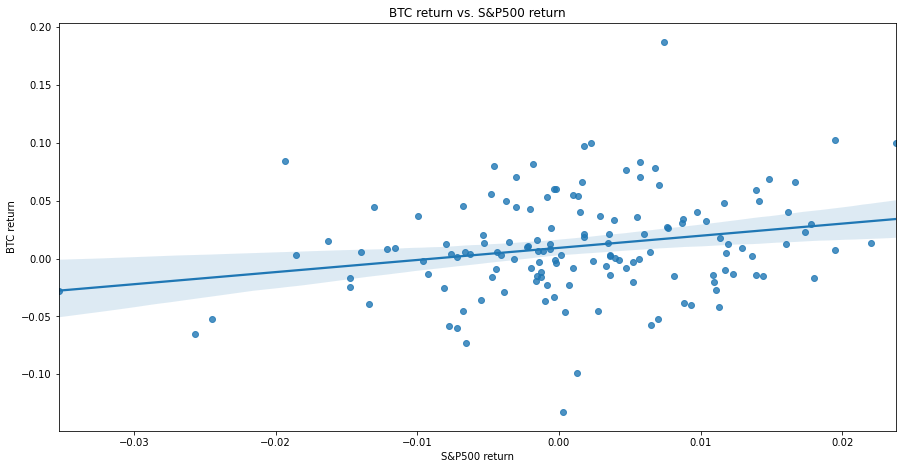

In [32]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='BTC_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. S&P500 return')
plt.show()

### ETH

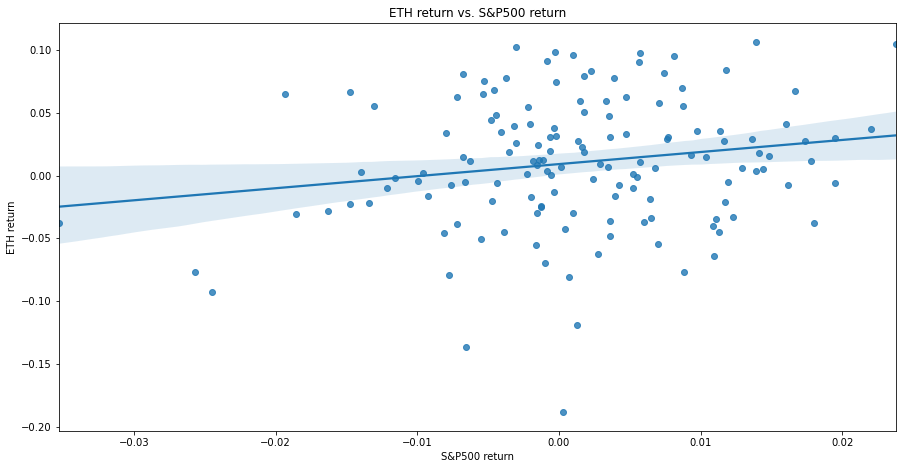

In [33]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='ETH_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('ETH return')
plt.title('ETH return vs. S&P500 return')
plt.show()

### BNB

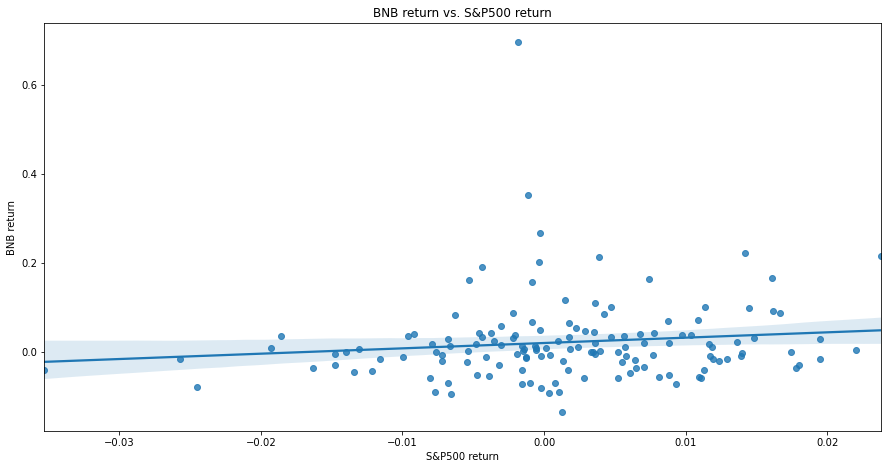

In [34]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='BNB_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BNB return')
plt.title('BNB return vs. S&P500 return')
plt.show()

### XRP

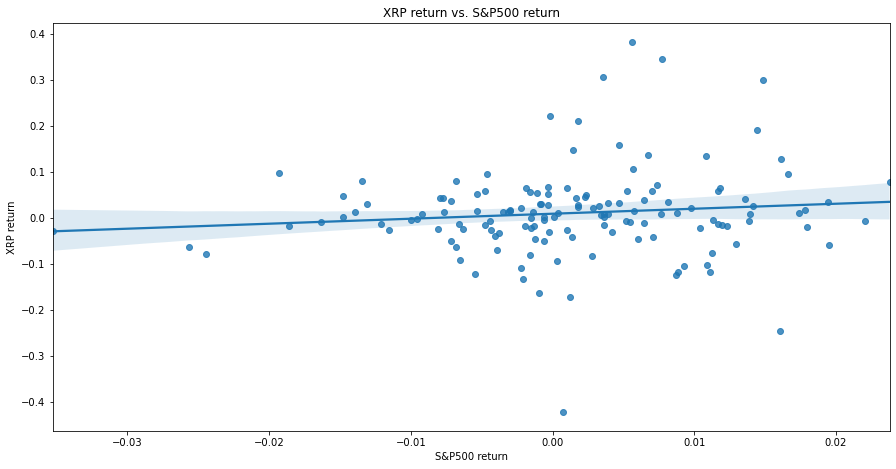

In [35]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='XRP_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('XRP return')
plt.title('XRP return vs. S&P500 return')
plt.show()

### USDT

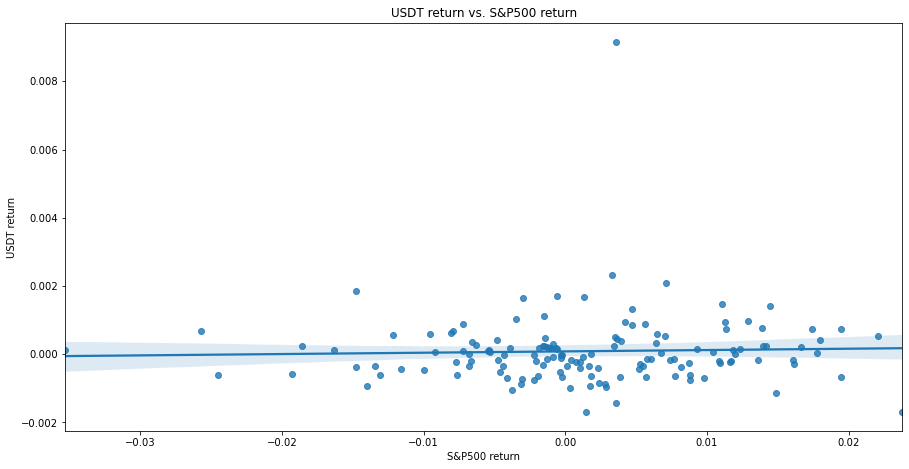

In [36]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='USDT_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('USDT return')
plt.title('USDT return vs. S&P500 return')
plt.show()

### DOGE

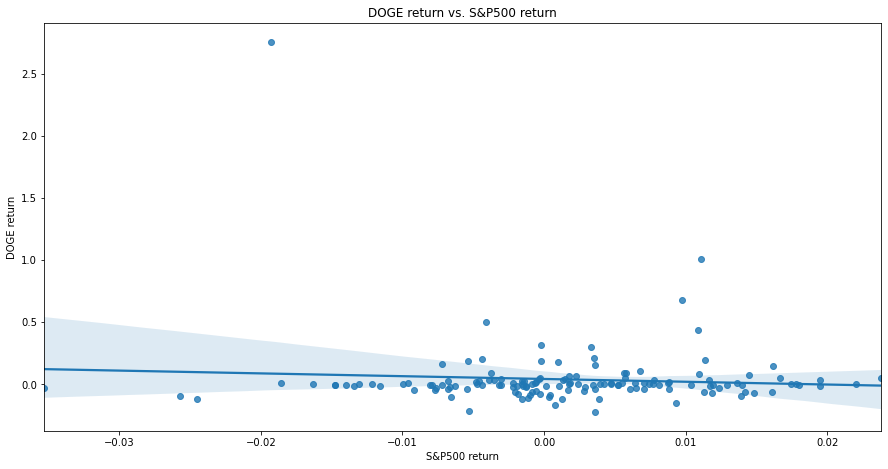

In [37]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='DOGE_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('DOGE return')
plt.title('DOGE return vs. S&P500 return')
plt.show()

### ADA

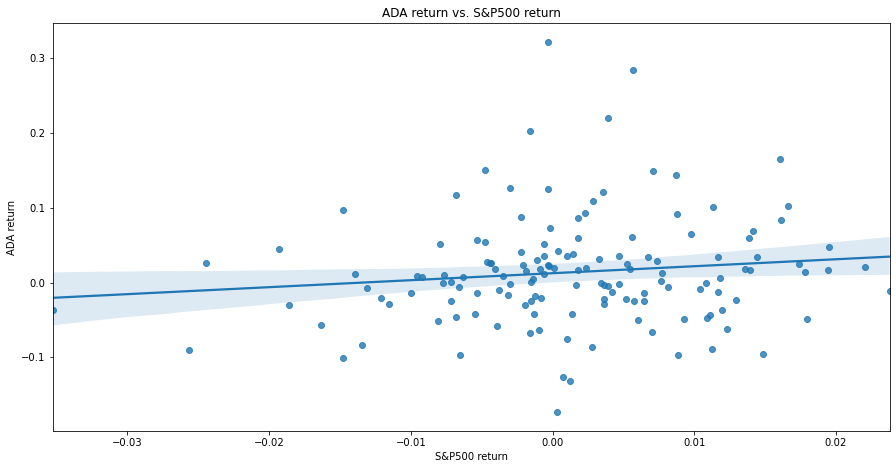

In [38]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='ADA_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('ADA return')
plt.title('ADA return vs. S&P500 return')
plt.show()

### BCH

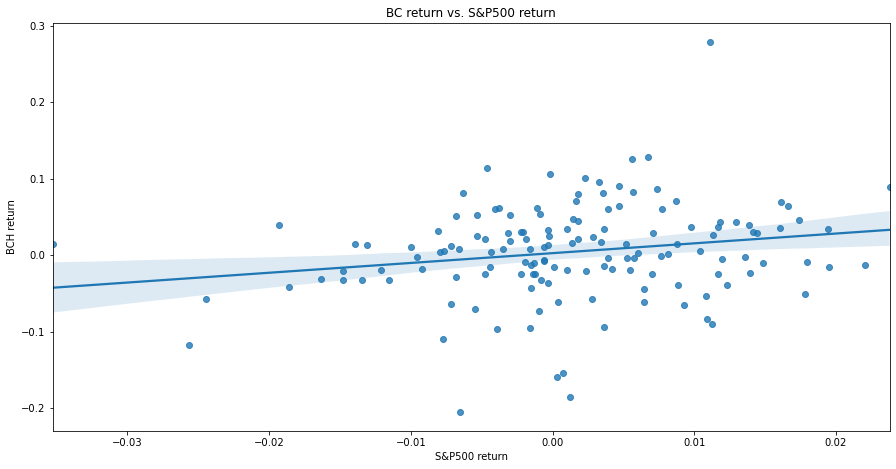

In [39]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='BCH_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BCH return')
plt.title('BC return vs. S&P500 return')
plt.show()

### LTC

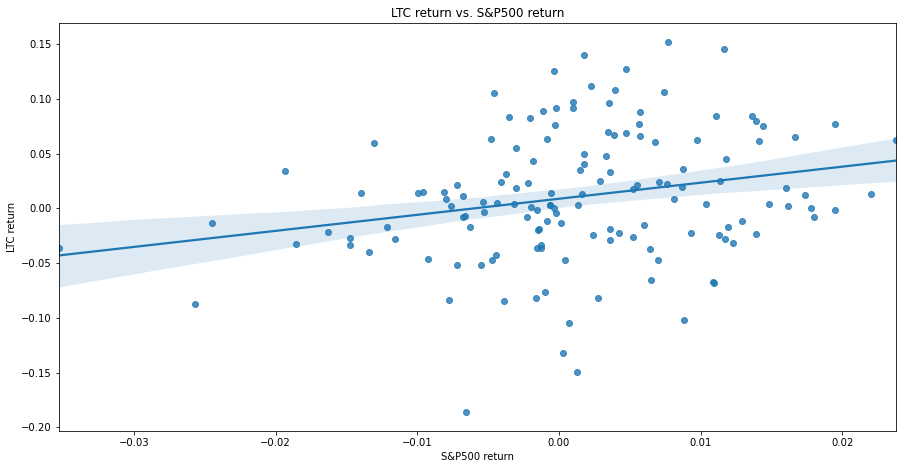

In [40]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='LTC_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('LTC return')
plt.title('LTC return vs. S&P500 return')
plt.show()

### LINK

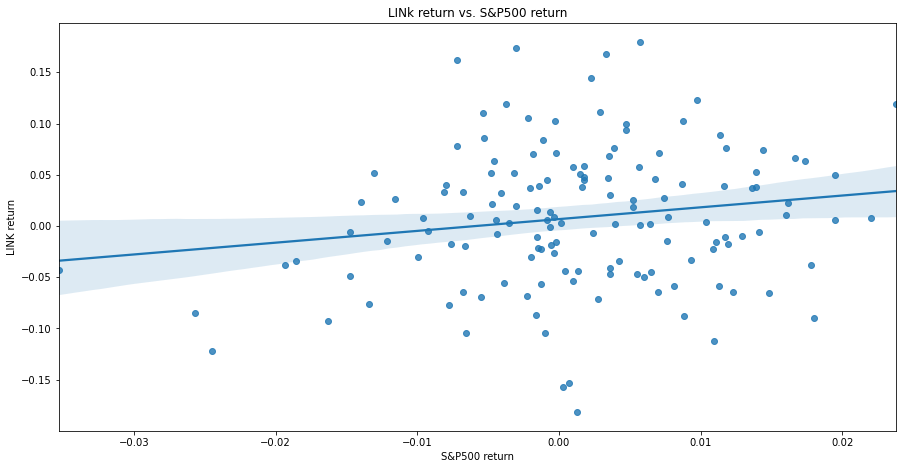

In [41]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='LINK_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('LINK return')
plt.title('LINk return vs. S&P500 return')
plt.show()

## For Dow Jones

### BTC

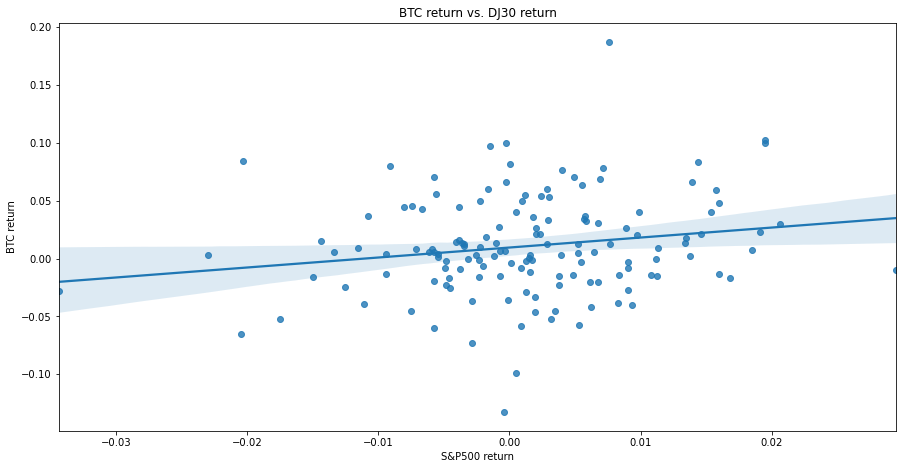

In [42]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='BTC_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### ETH

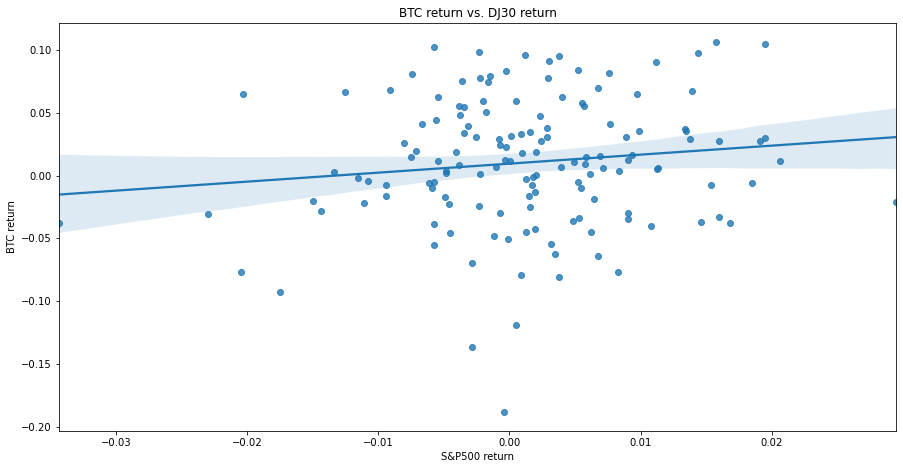

In [43]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='ETH_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### BNB

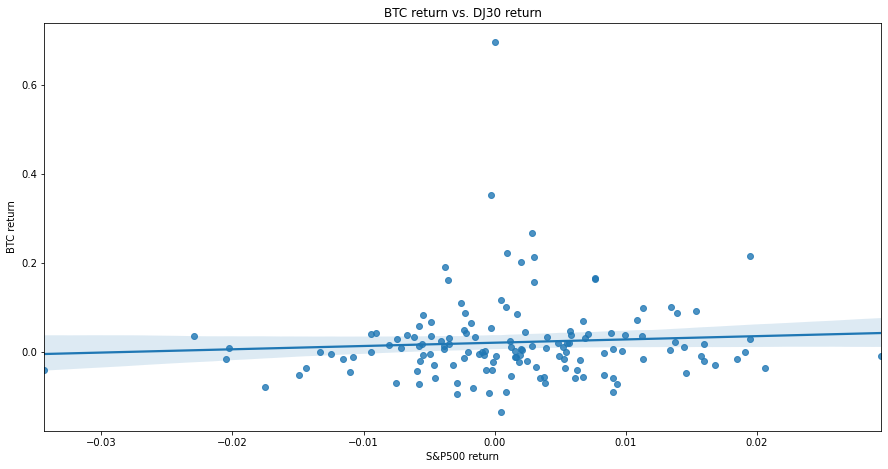

In [44]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='BNB_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### XPR

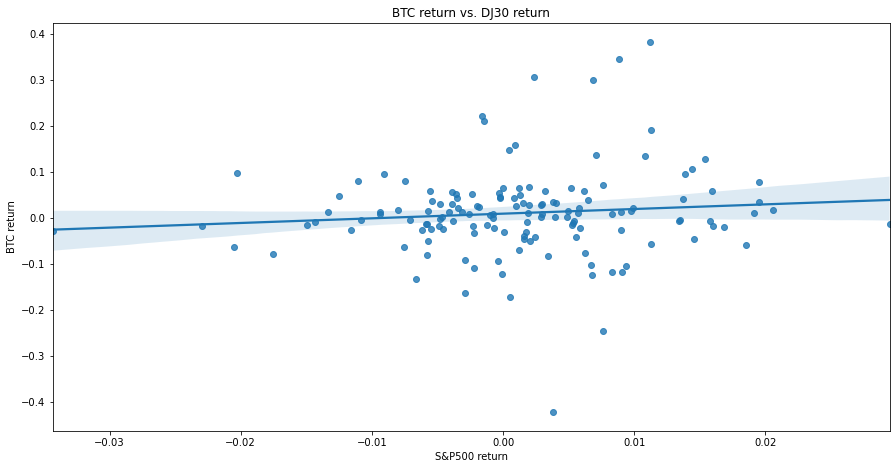

In [45]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='XRP_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### USDT

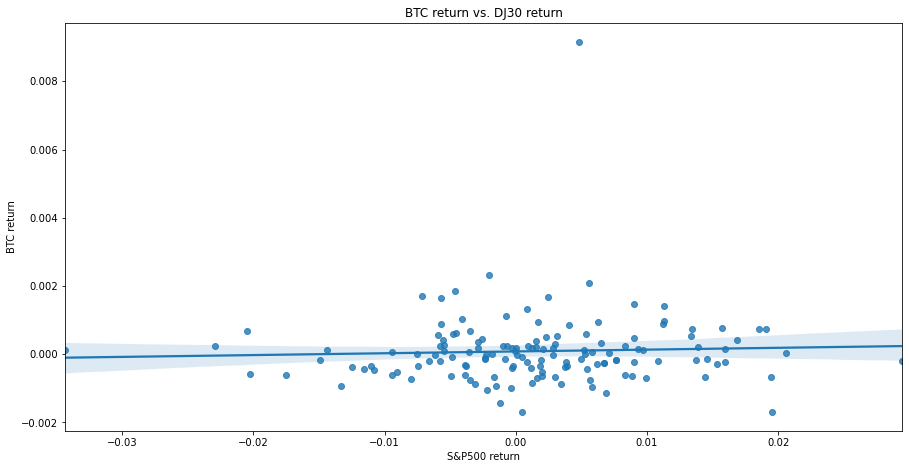

In [46]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='USDT_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### DOGE

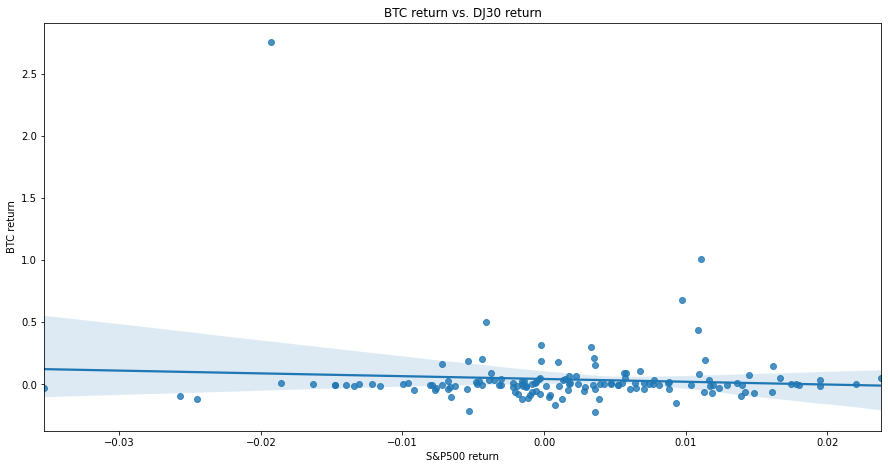

In [47]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='sp500_rtn',y='DOGE_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### ADA

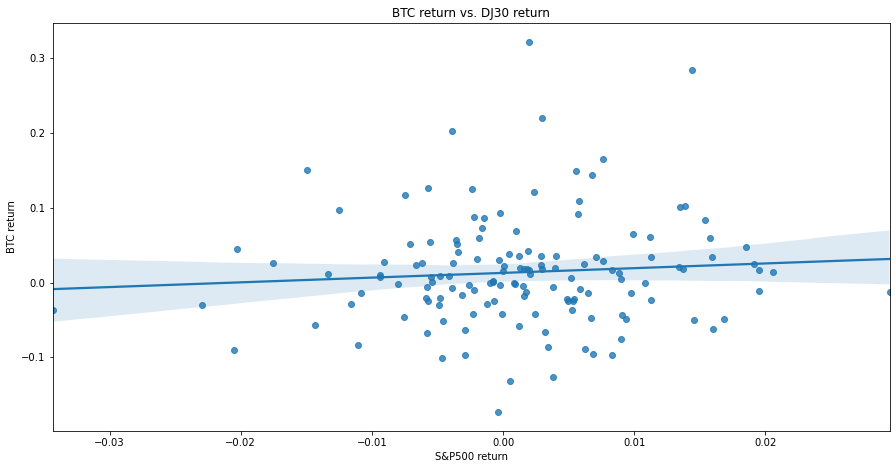

In [48]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='ADA_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### BCH 

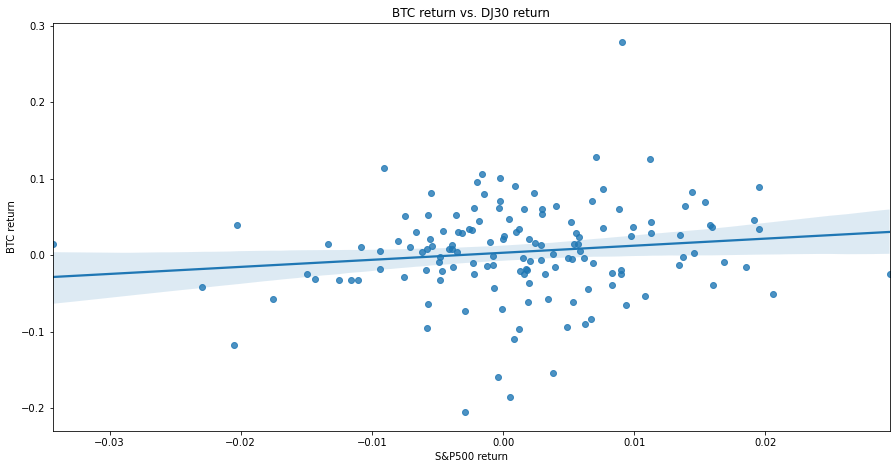

In [49]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='BCH_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### LTC

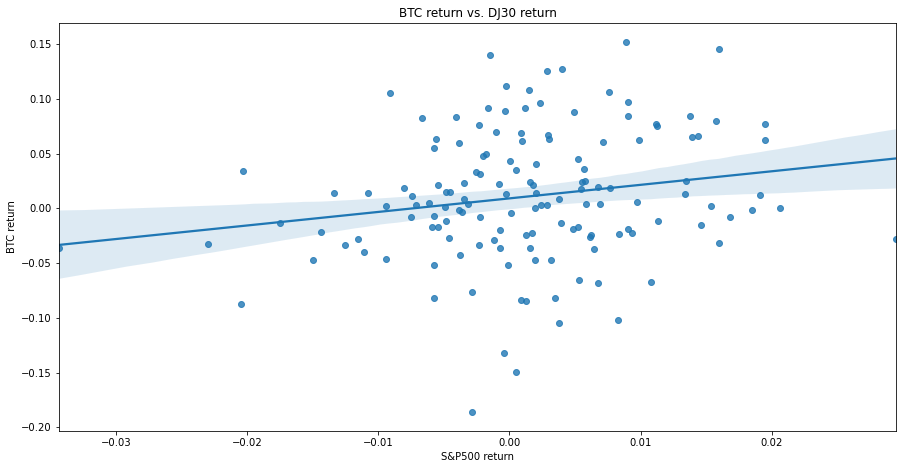

In [50]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='LTC_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()

### LINK

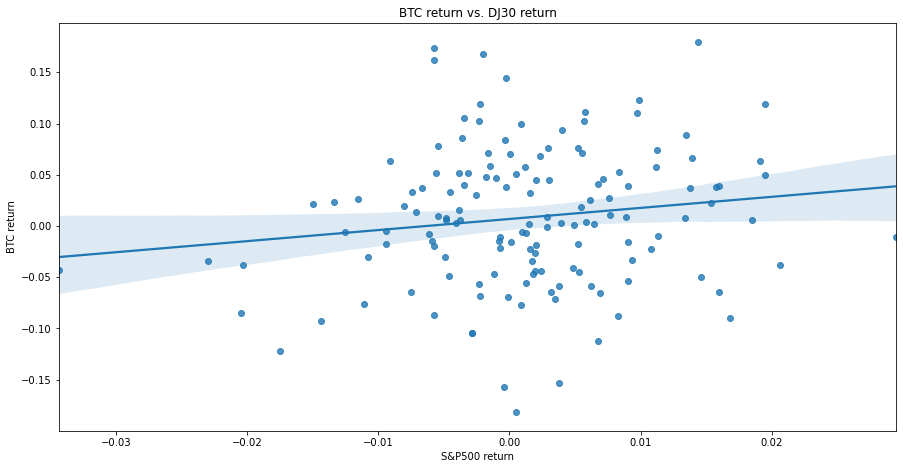

In [51]:
# step 1: plot our data as you want 
plt.subplots(figsize =(15, 7.5))
sns.regplot(x='DJ30_rtn',y='LINK_rtn',
                data = testing) # sampled just to avoid overplotting

# step 2: add the fitted regression line (the real X values and the predicted y values)
# sns.lineplot(x=diamonds2['lcarat'],y=y_predicted1,color='red')
plt.xlabel('S&P500 return')
plt.ylabel('BTC return')
plt.title('BTC return vs. DJ30 return')
plt.show()